In [1]:
# IMPORTACIÓN DE LIBRERIAS NECESARIAS:

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Lectura y exploración inicial de datasets.

In [2]:
# CREACIÓN DE UNA FUNCIÓN PARA LEER Y EXPLORAR CADA DATASET.

def leer_y_explorar_df(ruta_fichero):

    # Lectura del fichero
    try:
        df = pd.read_csv(ruta_fichero)
        print(f" Fichero {ruta_fichero} cargado correctamente:\n")
        print("\nPRIMERAS 5 FILAS DEL DATAFRAME")
        display(df.head(5))
        
    except FileNotFoundError:
        print(f" ERROR: No se encontró el fichero '{df}' en la ruta '{ruta_fichero}'")
        return None
    
    except Exception as e:
        print(f" ERROR inesperado al leer el fichero: {e}")
        return None

    # Dimensiones del dataset
    print(f" DIMENSIONES: {df.shape[0]} filas y {df.shape[1]} columnas\n")
    
    # Info general 
    print(" INFORMACIÓN GENERAL")
    df.info()
    
    # Sumatorio de valores nulos por columna
    print("\n VALORES NULOS POR COLUMNA")
    display(df.isnull().sum())
    
    # Sumatorio de filas duplicadas
    print("\n FILAS DUPLICADAS")
    print(f"Número de filas duplicadas: {df.duplicated().sum()}")

    # Principales estadísticas de las variables
    if df.select_dtypes(include='number').shape[1]:
        print("\nESTADÍSTICAS NUMÉRICAS:")
        display(df.describe().T)
    else:
        print("\n ESTADÍSTICAS NUMÉRICAS: No existen variables numéricas.")
    
    
    if df.select_dtypes(include='object').shape[1]:
        print("\nESTADÍSTICAS CATEGÓRICAS:")
        display(df.describe(include='object').T)
    else:
        print("\n ESTADÍSTICAS CATEGÓRICAS: No existen variables categóricas.")

    return df


In [3]:
# LECTURA Y EXPLORACIÓN DEL DATSET: Customer Flight Activity.csv (Análisis de vuelos de clientes)

df_vuelos = leer_y_explorar_df("files/Customer Flight Activity.csv")


 Fichero files/Customer Flight Activity.csv cargado correctamente:


PRIMERAS 5 FILAS DEL DATAFRAME


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


 DIMENSIONES: 405624 filas y 10 columnas

 INFORMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB

 VALORES NULOS POR COLUMNA


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64


 FILAS DUPLICADAS
Número de filas duplicadas: 1864

ESTADÍSTICAS NUMÉRICAS:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0



 ESTADÍSTICAS CATEGÓRICAS: No existen variables categóricas.


In [4]:
# LECTURA Y EXPLORACIÓN DE DATASET: Customer Loyalty History.csv(Historial de fidelidad del cliente)

df_clientes = leer_y_explorar_df("files/Customer Loyalty History.csv")


 Fichero files/Customer Loyalty History.csv cargado correctamente:


PRIMERAS 5 FILAS DEL DATAFRAME


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


 DIMENSIONES: 16737 filas y 16 columnas

 INFORMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   floa

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64


 FILAS DUPLICADAS
Número de filas duplicadas: 0

ESTADÍSTICAS NUMÉRICAS:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00



ESTADÍSTICAS CATEGÓRICAS:


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


Gestión de duplicados en dataset df_vuelos: 

In [5]:
# Comprobación de las filas totales del dataset, número de filas duplicadas y que porcentaje representan.

print(f" Total filas en df_vuelos = {df_vuelos.shape[0]}")

print(f"\n Filas duplicadas en df_vuelos = {df_vuelos.duplicated().sum()}")

porcentaje_duplicados = df_vuelos.duplicated().sum() / df_vuelos.shape[0] * 100
print(f"\nPorcentaje de filas duplicadas = {porcentaje_duplicados:.2f}%")



 Total filas en df_vuelos = 405624

 Filas duplicadas en df_vuelos = 1864

Porcentaje de filas duplicadas = 0.46%


In [6]:
# Comprobar el contenido de las filas duplicadas.

df_vuelos[df_vuelos.duplicated()]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


In [7]:
# Comprobación del número de valores únicos que contienen las filas duplicadas

df_dup = df_vuelos[df_vuelos.duplicated(keep="first")]
df_dup.shape
df_dup.nunique()

Loyalty Number                 159
Year                             2
Month                           12
Flights Booked                   1
Flights with Companions          1
Total Flights                    1
Distance                         1
Points Accumulated               1
Points Redeemed                  1
Dollar Cost Points Redeemed      1
dtype: int64

Conclusión : tras revisar las filas duplicadas, observo que representan un porcentaje muy pequeño del dataset (0,46 %) y que contienen exactamente los mismos valores en las variables numéricas. Estas filas no aportan información nueva y podrían afectar a los resultados de los cálculos estadísticos. Por ello, decido eliminarlas para mantener la calidad y fiabilidad del análisis.

In [8]:
# ELIMINAR DUPLICADOS DEL DATAFRAME df_vuelos

df_vuelos_sin_dupl = df_vuelos.drop_duplicates()

# Comprobación que se han eliminado correctamente.
print(f" Filas duplicadas en df_vuelos_sin_dupl:{df_vuelos_sin_dupl.duplicated().sum()}")
print(f" Número de filas de df_vuelos_sin_dupl: {df_vuelos_sin_dupl.shape[0]}")

 Filas duplicadas en df_vuelos_sin_dupl:0
 Número de filas de df_vuelos_sin_dupl: 403760


#  Unión de ficheros:
Los dos datasets se han unido mediante un left merge utilizando la columna Loyalty Number, tomando como base el dataset de vuelos. Esta decisión se debe a que el objetivo del análisis es estudiar la actividad de vuelo de los clientes, por lo que es importante conservar todos los registros de vuelos. De esta forma, se añade la información del perfil del cliente sin perder ninguna observación relevante para el análisis

In [9]:
# UNIÓN MEDIANTE LEFT MERGE DE LOS DOS FICHEROS

df_merge = df_vuelos_sin_dupl.merge(df_clientes, on= "Loyalty Number", how="left")

In [10]:
# EXPLORACIÓN DEL DATASET RESULTANTE PARA VERIFICAR QUE LA UNIÓN ES CORRECTA.

# Dimensiones: 
# Número de filas debe ser igual en ambos datasets
print(f"DIMENSIONES:")
print(f"{df_vuelos_sin_dupl.shape[0]} filas en el dataset principal vuelos")
print(f"{df_merge.shape[0]} filas tras el merge")

# Número de columnas.
print(f"{df_vuelos.shape[1]} columnas en el dataset principal vuelos.")
print(f"{df_clientes.shape[1]} columnas en el dataset clientes")
print(f"{df_merge.shape[1]} columnas tras el merge")

# Información general: tipos de datos, nombres de columnas.
print(f"\n INFORMACIÓN GENERAL:")
df_merge.info()

# Nulos por columnas.
print("\n NÚMERO DE NULOS:")
print(f"{df_merge.isnull().sum()}")
      
# Filas duplicadas.
print(f"\n NÚMERO DE FILAS DUPLICADAS: {df_merge.duplicated().sum()}")

# Identificadores de clientes
print(f"\n{df_vuelos_sin_dupl["Loyalty Number"].nunique()} Loyalty Number en dataset principal vuelos")
print(f"{df_clientes["Loyalty Number"].nunique()} Loyalty Number en dataset clientes")
print(f"{df_merge["Loyalty Number"].nunique()} Loyalty Number en dataset tras del merge")

## PENSAR SI QUITO ESTA PARTE PORQUE NO LA SE EXPLICAR BIEN Estadistica para ver que el merge no distorsiona datos
print(f"\nPromedio de vuelos reservados en dataset vuelos: {df_vuelos_sin_dupl["Flights Booked"].mean():.2f}%")
print(f"Promedio de vuelos reservados tras el merge {df_merge["Flights Booked"].mean():.2f}%") 

DIMENSIONES:
403760 filas en el dataset principal vuelos
403760 filas tras el merge
10 columnas en el dataset principal vuelos.
16 columnas en el dataset clientes
25 columnas tras el merge

 INFORMACIÓN GENERAL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Rede

# Limpieza de datos

In [11]:
# HOMOGENEIZAR NOMBRES DE LAS COLUMNAS: sustituir espacios por "_" y nombre en minúscula.

df_merge.columns = df_merge.columns.str.lower().str.replace(" ", "_")

# Compruebo resultado
df_merge.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

In [12]:
# CAMBIAR TIPO DE DATO DE LA COLUMNA MONTH A OBJECT 

df_merge["month"].unique()

array([ 1,  9,  2,  3, 11,  4,  5,  7,  6,  8, 10, 12])

In [13]:
# Creación de diccionario para transformar de número a nombres de meses

meses = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}
#  Reemplazo de los valores mediante método map() 
df_merge['month'] = df_merge['month'].map(meses)

# Comprobación de valores únicos para verificar que se ha realizado bien.
df_merge['month'].unique()

array(['Enero', 'Septiembre', 'Febrero', 'Marzo', 'Noviembre', 'Abril',
       'Mayo', 'Julio', 'Junio', 'Agosto', 'Octubre', 'Diciembre'],
      dtype=object)

In [14]:
#ELIMINAR COLUMNAS NO RELEVANTES PARA EL ANÁLISIS

eliminar =["flights_booked","points_redeemed","dollar_cost_points_redeemed","city","postal_code","clv","enrollment_year",
           "enrollment_month","cancellation_year","cancellation_month"]
df_merge.drop(eliminar,axis=1,inplace=True)

In [15]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loyalty_number           403760 non-null  int64  
 1   year                     403760 non-null  int64  
 2   month                    403760 non-null  object 
 3   flights_with_companions  403760 non-null  int64  
 4   total_flights            403760 non-null  int64  
 5   distance                 403760 non-null  int64  
 6   points_accumulated       403760 non-null  float64
 7   country                  403760 non-null  object 
 8   province                 403760 non-null  object 
 9   gender                   403760 non-null  object 
 10  education                403760 non-null  object 
 11  salary                   301500 non-null  float64
 12  marital_status           403760 non-null  object 
 13  loyalty_card             403760 non-null  object 
 14  enro

In [16]:
df_merge.head()

,loyalty_number,year,month,flights_with_companions,total_flights,distance,points_accumulated,country,province,gender,education,salary,marital_status,loyalty_card,enrollment_type
0,100018,2017,Enero,0,3,1521,152.0,Canada,Alberta,Female,Bachelor,92552.0,Married,Aurora,Standard
1,100102,2017,Enero,4,14,2030,203.0,Canada,Ontario,Male,College,NaN,Single,Nova,Standard
2,100140,2017,Enero,0,6,1200,120.0,Canada,British Columbia,Female,College,NaN,Divorced,Nova,Standard
3,100214,2017,Enero,0,0,0,0.0,Canada,British Columbia,Male,Bachelor,63253.0,Married,Star,Standard
4,100272,2017,Enero,0,0,0,0.0,Canada,Ontario,Female,Bachelor,91163.0,Divorced,Star,Standard


# Gestión de nulos

La única columna con valores nulos es "salary", una columna numérica relevante para el análisis.
 Para tomar una decision respecto a esos valores:
1-Compruebo cantidad de valores nulos y el porcentaje que representan.
2-Compruebo si existen valores atípicos en la columna.

In [33]:
# COMPROBACIÓN DE NULOS y %

# Total de nulos en la columna
print(f"Total de valores nulos: {df_merge['salary'].isnull().sum()}")

# Calcular el porcentaje que representan
porc_nulos = df_merge["salary"].isnull().sum() / df_merge.shape[0] * 100
print(f"Estos nulos representan el {porc_nulos:.2f}% del total de filas.")

# Estadistica descriptiva
print("\nEstadísticas descriptivas:")
print(df_merge['salary'].describe().T)



Total de valores nulos: 102260
Estos nulos representan el 25.33% del total de filas.

Estadísticas descriptivas:
count    301500.000000
mean      79258.576285
std       34983.929798
min      -58486.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: salary, dtype: float64


In [38]:
# COMPROBACIÓN DE VALORES MÍNIMOS

# Comprobar si hay valores igual a 0 y negativos
print(f"Número de valores negativos registrados:{(df_merge["salary"] <= 0).sum()}")

# Porcentaje que representan del total de la columna
print(f"Porcentaje que representan los negativos: {(df_merge['salary'] <= 0).mean() * 100:.2f}%")

# Ver algunos ejemplos de valores negativos
df_merge[df_merge["salary"]<=0]

Número de valores negativos registrados:480
Porcentaje que representan los negativos: 0.12%


,loyalty_number,year,month,flights_with_companions,total_flights,distance,points_accumulated,country,province,gender,education,salary,marital_status,loyalty_card,enrollment_type
291,115505,2017,Enero,0,0,0,0.0,Canada,Newfoundland,Male,Bachelor,-10605.0,Married,Nova,2018 Promotion
956,152016,2017,Enero,0,0,0,0.0,Canada,Ontario,Female,Bachelor,-58486.0,Married,Aurora,2018 Promotion
1716,194065,2017,Enero,0,0,0,0.0,Canada,Ontario,Female,Bachelor,-31911.0,Married,Nova,2018 Promotion
2081,212128,2017,Enero,0,3,1959,195.0,Canada,Ontario,Male,Bachelor,-49001.0,Married,Nova,2018 Promotion
2433,232755,2017,Enero,0,0,0,0.0,Canada,British Columbia,Female,Bachelor,-46683.0,Single,Nova,2018 Promotion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398813,734647,2018,Diciembre,0,15,1440,144.0,Canada,Saskatchewan,Male,Bachelor,-46303.0,Married,Nova,2018 Promotion
399884,790475,2018,Diciembre,1,8,1056,105.0,Canada,Ontario,Female,Bachelor,-34079.0,Married,Nova,2018 Promotion
402017,906428,2018,Diciembre,0,13,2912,291.0,Canada,Yukon,Male,Bachelor,-57297.0,Married,Star,2018 Promotion
402459,430398,2018,Diciembre,5,10,660,66.0,Canada,Newfoundland,Male,Bachelor,-17534.0,Married,Nova,2018 Promotion


In [47]:
df_merge["education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [ ]:
negativos = df_merge[df_merge["salary"] < 0]



In [52]:
negativos["education"].value_counts()# negativos por nivel academico




education
Bachelor                456
High School or Below     24
Name: count, dtype: int64

In [53]:
negativos["education"].value_counts(normalize=True) * 100# porcentaje dentro de los negativos

education
Bachelor                95.0
High School or Below     5.0
Name: proportion, dtype: float64

In [68]:
df_merge["education"].value_counts(normalize=True) * 100# porcentaje dentro de los negativos

education
Bachelor                62.553745
College                 25.326927
High School or Below     4.684714
Doctor                   4.391470
Master                   3.043144
Name: proportion, dtype: float64

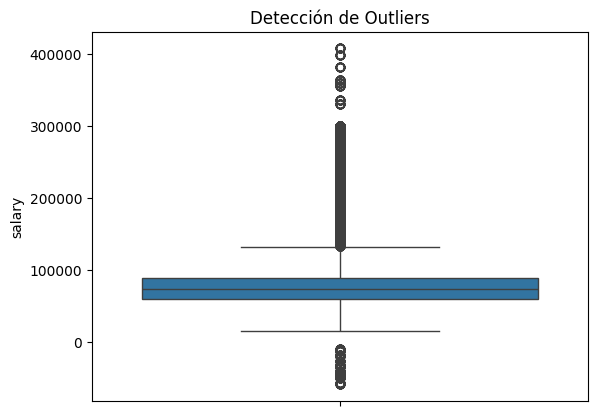

In [41]:
# COMPROBACIÓN DE VALORES ATÍPICOS MEDIANTE VISUALIZACION

sns.boxplot(y='salary', data=df_merge)
plt.title('Detección de Outliers')
plt.show()